# _(Brette, Romain. 2004)_ LIF phase locking 

Implementation of the paper:

- Brette, Romain. "Dynamics of one-dimensional spiking neuron models." Journal of mathematical biology 48.1 (2004): 38-56.

Author:

- Chaoming Wang (chao.brain@qq.com)

In [1]:
import brainpy as bp
import brainpy.math as bm

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
# set parameters
num = 2000
tau = 100.  # ms
Vth = 1.  # mV
Vr = 0.  # mV
inputs = bm.linspace(2., 4., num)

In [4]:
class LIF(bp.NeuGroup):
  def __init__(self, size, **kwargs):
    super(LIF, self).__init__(size, **kwargs)
    
    self.V = bm.Variable(bm.zeros(size))
    self.spike = bm.Variable(bm.zeros(size, dtype=bool))
    self.integral = bp.odeint(self.derivative)

  def derivative(self, V, t):
    return (-V + inputs + 2 * bm.sin(2 * bm.pi * t / tau)) / tau

  def update(self, _t, _dt):
    V = self.integral(self.V, _t, _dt)
    self.spike.value = V >= Vth
    self.V.value = bm.where(self.spike > 0., Vr, V)

In [5]:
group = LIF(num)
runner = bp.StructRunner(group, monitors=['spike'])

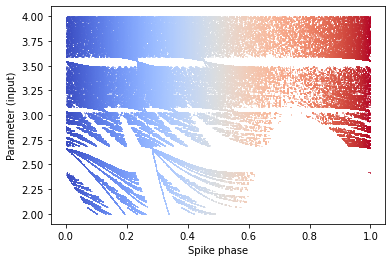

In [6]:
t = runner.run(duration=5 * 1000.)

indices, times = bp.measure.raster_plot(runner.mon.spike, runner.mon.ts)

# plt.plot((times % tau) / tau, inputs[indices], ',')

spike_phases = (times % tau) / tau
params = inputs[indices]
plt.scatter(x=spike_phases, y=params, c=spike_phases, marker=',', s=0.1, cmap="coolwarm")

plt.xlabel('Spike phase')
plt.ylabel('Parameter (input)')
plt.show()